# Trigram Languade Model

In [ ]:
words=open("names.txt","r").read().splitlines()

print("Total Words",len(words))
print("Max Length",max(len(i) for i in words))
print("Min Length,",min(len(i) for i in words))


In [10]:
import warnings
warnings.filterwarnings('ignore')

# Creating Traning Set

In [2]:
import torch
Alpha_table=sorted(set("".join(words)))
Alpha_numb={s:i+1 for i,s in enumerate(Alpha_table)}
Alpha_numb["."]=0

xs,ys=[],[]

for word in words:
    token=["."]+list(word)+["."]
    for w1,w2,w3 in zip(token,token[1:],token[2:]):
        idx1=Alpha_numb[w1]
        idx2=Alpha_numb[w2]
        idx3=Alpha_numb[w3]
        
        xs.append([idx1,idx2])
        ys.append([idx3])
        
xs=torch.tensor(xs)
ys=torch.tensor(ys)

In [48]:
itos={s:i for i,s in Alpha_numb.items()}

In [14]:
len(xs)/20

9805.65

# Creating Batch for Traning set

In [16]:
import torch.nn.functional as f
import numpy as np
# hot=f.one_hot(xs,num_classes=27)
X=torch.zeros((len(xs),27),dtype=torch.float32)
for i in range(len(xs)):
    X[i,xs[i,0]]=1
    X[i,xs[i,1]]=1
    
    
CX=[];CY=[]
for i in range(20):
    CX.append(X[i:9805])
    CY.append(ys[i:9805])


In [17]:
CX=np.array(CX);CY=np.array(CY)

# Traning Loop

In [30]:
W=torch.randn((27,27),requires_grad=True)

In [31]:
from tqdm.auto import tqdm
loss_list=[]
epo=[]
for i in range(100):
    
    for x1,y1 in tqdm(zip(CX,CY)):

        logits=(x1@W)
        exp=torch.exp(logits)
        softmax=exp/torch.sum(exp,dim=1,keepdims=True)
        loss=-torch.log(softmax[torch.arange(len(x1)),y1]).mean() +0.01*(W**2).mean()
        print(loss)
        W.grad=None
        loss.backward()
        W.data+=-20* W.grad
    
   
    print(f"Epochs- {i} Loss",loss)
    loss_list.append(loss)
    epo.append(i)
    

0it [00:00, ?it/s]

tensor(4.3669, grad_fn=<AddBackward0>)
tensor(3.7078, grad_fn=<AddBackward0>)
tensor(3.3750, grad_fn=<AddBackward0>)
tensor(3.1935, grad_fn=<AddBackward0>)
tensor(3.0841, grad_fn=<AddBackward0>)
tensor(3.0089, grad_fn=<AddBackward0>)
tensor(2.9536, grad_fn=<AddBackward0>)
tensor(2.9113, grad_fn=<AddBackward0>)
tensor(2.8779, grad_fn=<AddBackward0>)
tensor(2.8510, grad_fn=<AddBackward0>)
tensor(2.8287, grad_fn=<AddBackward0>)
tensor(2.8097, grad_fn=<AddBackward0>)
tensor(2.7936, grad_fn=<AddBackward0>)
tensor(2.7797, grad_fn=<AddBackward0>)
tensor(2.7674, grad_fn=<AddBackward0>)
tensor(2.7568, grad_fn=<AddBackward0>)
tensor(2.7471, grad_fn=<AddBackward0>)
tensor(2.7387, grad_fn=<AddBackward0>)
tensor(2.7311, grad_fn=<AddBackward0>)
tensor(2.7243, grad_fn=<AddBackward0>)
Epochs- 0 Loss tensor(2.7243, grad_fn=<AddBackward0>)


0it [00:00, ?it/s]

tensor(2.7186, grad_fn=<AddBackward0>)
tensor(2.7128, grad_fn=<AddBackward0>)
tensor(2.7076, grad_fn=<AddBackward0>)
tensor(2.7030, grad_fn=<AddBackward0>)
tensor(2.6988, grad_fn=<AddBackward0>)
tensor(2.6948, grad_fn=<AddBackward0>)
tensor(2.6912, grad_fn=<AddBackward0>)
tensor(2.6876, grad_fn=<AddBackward0>)
tensor(2.6844, grad_fn=<AddBackward0>)
tensor(2.6816, grad_fn=<AddBackward0>)
tensor(2.6789, grad_fn=<AddBackward0>)
tensor(2.6761, grad_fn=<AddBackward0>)
tensor(2.6738, grad_fn=<AddBackward0>)
tensor(2.6716, grad_fn=<AddBackward0>)
tensor(2.6694, grad_fn=<AddBackward0>)
tensor(2.6675, grad_fn=<AddBackward0>)
tensor(2.6653, grad_fn=<AddBackward0>)
tensor(2.6636, grad_fn=<AddBackward0>)
tensor(2.6619, grad_fn=<AddBackward0>)
tensor(2.6603, grad_fn=<AddBackward0>)
Epochs- 1 Loss tensor(2.6603, grad_fn=<AddBackward0>)


0it [00:00, ?it/s]

tensor(2.6593, grad_fn=<AddBackward0>)
tensor(2.6577, grad_fn=<AddBackward0>)
tensor(2.6561, grad_fn=<AddBackward0>)
tensor(2.6549, grad_fn=<AddBackward0>)
tensor(2.6537, grad_fn=<AddBackward0>)
tensor(2.6526, grad_fn=<AddBackward0>)
tensor(2.6515, grad_fn=<AddBackward0>)
tensor(2.6502, grad_fn=<AddBackward0>)
tensor(2.6491, grad_fn=<AddBackward0>)
tensor(2.6482, grad_fn=<AddBackward0>)
tensor(2.6474, grad_fn=<AddBackward0>)
tensor(2.6462, grad_fn=<AddBackward0>)
tensor(2.6454, grad_fn=<AddBackward0>)
tensor(2.6447, grad_fn=<AddBackward0>)
tensor(2.6437, grad_fn=<AddBackward0>)
tensor(2.6431, grad_fn=<AddBackward0>)
tensor(2.6421, grad_fn=<AddBackward0>)
tensor(2.6414, grad_fn=<AddBackward0>)
tensor(2.6407, grad_fn=<AddBackward0>)
tensor(2.6400, grad_fn=<AddBackward0>)
Epochs- 2 Loss tensor(2.6400, grad_fn=<AddBackward0>)


0it [00:00, ?it/s]

tensor(2.6399, grad_fn=<AddBackward0>)
tensor(2.6391, grad_fn=<AddBackward0>)
tensor(2.6383, grad_fn=<AddBackward0>)
tensor(2.6378, grad_fn=<AddBackward0>)
tensor(2.6373, grad_fn=<AddBackward0>)
tensor(2.6368, grad_fn=<AddBackward0>)
tensor(2.6363, grad_fn=<AddBackward0>)
tensor(2.6356, grad_fn=<AddBackward0>)
tensor(2.6351, grad_fn=<AddBackward0>)
tensor(2.6347, grad_fn=<AddBackward0>)
tensor(2.6343, grad_fn=<AddBackward0>)
tensor(2.6336, grad_fn=<AddBackward0>)
tensor(2.6332, grad_fn=<AddBackward0>)
tensor(2.6329, grad_fn=<AddBackward0>)
tensor(2.6324, grad_fn=<AddBackward0>)
tensor(2.6321, grad_fn=<AddBackward0>)
tensor(2.6314, grad_fn=<AddBackward0>)
tensor(2.6311, grad_fn=<AddBackward0>)
tensor(2.6307, grad_fn=<AddBackward0>)
tensor(2.6304, grad_fn=<AddBackward0>)
Epochs- 3 Loss tensor(2.6304, grad_fn=<AddBackward0>)


0it [00:00, ?it/s]

tensor(2.6305, grad_fn=<AddBackward0>)
tensor(2.6300, grad_fn=<AddBackward0>)
tensor(2.6295, grad_fn=<AddBackward0>)
tensor(2.6292, grad_fn=<AddBackward0>)
tensor(2.6290, grad_fn=<AddBackward0>)
tensor(2.6287, grad_fn=<AddBackward0>)
tensor(2.6284, grad_fn=<AddBackward0>)
tensor(2.6279, grad_fn=<AddBackward0>)
tensor(2.6276, grad_fn=<AddBackward0>)
tensor(2.6274, grad_fn=<AddBackward0>)
tensor(2.6272, grad_fn=<AddBackward0>)
tensor(2.6267, grad_fn=<AddBackward0>)
tensor(2.6265, grad_fn=<AddBackward0>)
tensor(2.6264, grad_fn=<AddBackward0>)
tensor(2.6260, grad_fn=<AddBackward0>)
tensor(2.6258, grad_fn=<AddBackward0>)
tensor(2.6254, grad_fn=<AddBackward0>)
tensor(2.6252, grad_fn=<AddBackward0>)
tensor(2.6250, grad_fn=<AddBackward0>)
tensor(2.6247, grad_fn=<AddBackward0>)
Epochs- 4 Loss tensor(2.6247, grad_fn=<AddBackward0>)


0it [00:00, ?it/s]

tensor(2.6250, grad_fn=<AddBackward0>)
tensor(2.6246, grad_fn=<AddBackward0>)
tensor(2.6242, grad_fn=<AddBackward0>)
tensor(2.6241, grad_fn=<AddBackward0>)
tensor(2.6240, grad_fn=<AddBackward0>)
tensor(2.6238, grad_fn=<AddBackward0>)
tensor(2.6236, grad_fn=<AddBackward0>)
tensor(2.6232, grad_fn=<AddBackward0>)
tensor(2.6230, grad_fn=<AddBackward0>)
tensor(2.6229, grad_fn=<AddBackward0>)
tensor(2.6228, grad_fn=<AddBackward0>)
tensor(2.6224, grad_fn=<AddBackward0>)
tensor(2.6223, grad_fn=<AddBackward0>)
tensor(2.6222, grad_fn=<AddBackward0>)
tensor(2.6220, grad_fn=<AddBackward0>)
tensor(2.6219, grad_fn=<AddBackward0>)
tensor(2.6215, grad_fn=<AddBackward0>)
tensor(2.6214, grad_fn=<AddBackward0>)
tensor(2.6212, grad_fn=<AddBackward0>)
tensor(2.6211, grad_fn=<AddBackward0>)
Epochs- 5 Loss tensor(2.6211, grad_fn=<AddBackward0>)


0it [00:00, ?it/s]

tensor(2.6214, grad_fn=<AddBackward0>)
tensor(2.6211, grad_fn=<AddBackward0>)
tensor(2.6208, grad_fn=<AddBackward0>)
tensor(2.6207, grad_fn=<AddBackward0>)
tensor(2.6207, grad_fn=<AddBackward0>)
tensor(2.6205, grad_fn=<AddBackward0>)
tensor(2.6204, grad_fn=<AddBackward0>)
tensor(2.6201, grad_fn=<AddBackward0>)
tensor(2.6200, grad_fn=<AddBackward0>)
tensor(2.6199, grad_fn=<AddBackward0>)
tensor(2.6199, grad_fn=<AddBackward0>)
tensor(2.6195, grad_fn=<AddBackward0>)
tensor(2.6195, grad_fn=<AddBackward0>)
tensor(2.6194, grad_fn=<AddBackward0>)
tensor(2.6192, grad_fn=<AddBackward0>)
tensor(2.6192, grad_fn=<AddBackward0>)
tensor(2.6188, grad_fn=<AddBackward0>)
tensor(2.6188, grad_fn=<AddBackward0>)
tensor(2.6187, grad_fn=<AddBackward0>)
tensor(2.6186, grad_fn=<AddBackward0>)
Epochs- 6 Loss tensor(2.6186, grad_fn=<AddBackward0>)


0it [00:00, ?it/s]

tensor(2.6189, grad_fn=<AddBackward0>)
tensor(2.6186, grad_fn=<AddBackward0>)
tensor(2.6184, grad_fn=<AddBackward0>)
tensor(2.6184, grad_fn=<AddBackward0>)
tensor(2.6183, grad_fn=<AddBackward0>)
tensor(2.6183, grad_fn=<AddBackward0>)
tensor(2.6182, grad_fn=<AddBackward0>)
tensor(2.6179, grad_fn=<AddBackward0>)
tensor(2.6178, grad_fn=<AddBackward0>)
tensor(2.6178, grad_fn=<AddBackward0>)
tensor(2.6178, grad_fn=<AddBackward0>)
tensor(2.6175, grad_fn=<AddBackward0>)
tensor(2.6175, grad_fn=<AddBackward0>)
tensor(2.6175, grad_fn=<AddBackward0>)
tensor(2.6173, grad_fn=<AddBackward0>)
tensor(2.6173, grad_fn=<AddBackward0>)
tensor(2.6169, grad_fn=<AddBackward0>)
tensor(2.6169, grad_fn=<AddBackward0>)
tensor(2.6168, grad_fn=<AddBackward0>)
tensor(2.6168, grad_fn=<AddBackward0>)
Epochs- 7 Loss tensor(2.6168, grad_fn=<AddBackward0>)


0it [00:00, ?it/s]

tensor(2.6171, grad_fn=<AddBackward0>)
tensor(2.6169, grad_fn=<AddBackward0>)
tensor(2.6167, grad_fn=<AddBackward0>)
tensor(2.6167, grad_fn=<AddBackward0>)
tensor(2.6167, grad_fn=<AddBackward0>)
tensor(2.6166, grad_fn=<AddBackward0>)
tensor(2.6166, grad_fn=<AddBackward0>)
tensor(2.6163, grad_fn=<AddBackward0>)
tensor(2.6162, grad_fn=<AddBackward0>)
tensor(2.6162, grad_fn=<AddBackward0>)
tensor(2.6162, grad_fn=<AddBackward0>)
tensor(2.6160, grad_fn=<AddBackward0>)
tensor(2.6160, grad_fn=<AddBackward0>)
tensor(2.6160, grad_fn=<AddBackward0>)


KeyboardInterrupt: 

In [35]:
from matplotlib import pyplot as plt

In [39]:
losses=[]
for i in loss_list:
    losses.append(i.detach().numpy())

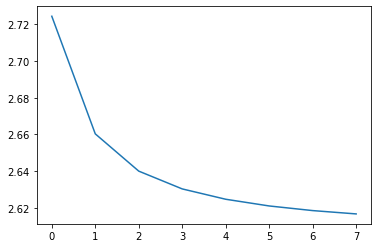

In [40]:
plt.plot(epo,losses)

In [43]:
def Multi_One_Hot(array):
    vec=torch.zeros((1,27)).float()
    vec[0,array[0]]=1
    vec[0,array[1]]=1
    
    return vec

In [45]:
Multi_One_Hot([1,2]).shape

torch.Size([1, 27])

In [91]:
# g=torch.Generator().manual_seed(5)

idx1,idx2=0,26
names=[]
for i in range(10):
    while True:
        X=Multi_One_Hot([idx1,idx2])
        logits=(X@W)

        ex=torch.exp(logits)
        softop=ex/torch.sum(ex,dim=1,keepdims=True)
#         print(softop)
        idx=torch.multinomial(softop,num_samples=1,replacement=True,generator=g).item()
    
        idx1=idx2
        idx2=idx
        itos[idx]
        names.append(itos[idx])
        if idx==0:
            break
    print("".join(names))
    names.clear()

l.
.
velllia.
nlir.
sravnarayda.
hriea.
elaa.
ntaauhvarlyzyasmy.
laaacdfj.
aliyhxlnryons.
